<a href="https://colab.research.google.com/github/Raffae2679/Convertedor-de-Bases/blob/main/Projeto_CN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Funções de Conversão

- **conv_any_to_b10**: Recebe um número e sua base, depois é convertido para base 10. Números reais devem ser inseridos usando virgula e como string (ex: "2,5").

    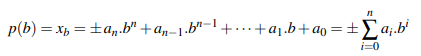

- **conv_b10_to_any**: Recebe um número de base 10 e converter para a base desejada. Os números reais devem ser inseridos usando ponto (ex: 2.5).

- **conv_any_to_any**: Recebe uma string que representa um número de base qualquer, a base do respectivo número e a base para qual será convertida.


In [ ]:
def conv_any_to_b10(num,base):
  ''' Converte números de qualquer base para base 10 '''
  
  hex = {'A':'10','B':'11','C':'12','D':'13','E':'14','F':'15'}

  num_int,num_dec = separa_num(num) # ex: 23,5 => 23 | 5

  tam = len(num_int)-1
  valor = 0

  for i in num_int:

    if i in hex:
      valor += int(hex[i])*(base**tam)
    else:
      valor += int(i)*(base**tam)

    tam -= 1
  
  if num_dec == 0:     # A função separa_num atribui zero a num_dec quando o número é inteiro
    return int(valor)
  
  else:
    tam = len(num_dec)-1
    valor2 = 0

    for i in num_dec:
      valor2 += int(i)*(base**tam)
      tam -= 1   

    valor2 = float(valor2/10**len(str(valor2)))  # Transforma o a 2° parte em decimal
    

 
  return valor+ valor2




In [ ]:
def conv_b10_to_any(num,base):

  hex = {'10':'A','11':'B','12':'C','13':'D','14':'E','15':'F'}
  
  if float(num)<1:
    return conv_real_to_any(num,base)
  
  else:
    n_final = ""
    n_inicial = float(num)
    base = int(base)
  
    while num !=0:
      resto = int(num%base)
      num = int(num/base)
      
      if str(resto) in hex:
        n_final += hex[str(resto)]
      else:
        n_final += str(resto)

    if (n_inicial-int(n_inicial))!=0:
      dec_part = n_inicial-int(n_inicial)
      
      dec_part_conv = conv_real_to_any(dec_part,base)

      return f'{n_final[::-1]},{dec_part_conv}'
    
    if base in [12,16]:
      return n_final[::-1]
    else:
      return int(n_final[::-1])

In [ ]:
def conv_any_to_any(num,b,b_out):
  num_b10 = conv_any_to_b10(num,b)
  
  return conv_b10_to_any(num_b10,b_out)



## Funções Auxiliares

- **separa_num**: Recebe um número número real e retorna em duas váriaveis a parte inteira e decimal. Ex: 50,30 =>  retorno 50 e 30 

- **conv_real_to_any**: Recebe um número decimal e a base para qual será convertido. Essa função auxilia na função de conversão b10_to_any, sendo responsável por converter o número decimal (Usando algoritmo de divisão euclides).  

    imagem_2021-06-30_212634.png

In [ ]:
def separa_num(num):
  sep = num.split(',')
  num_int = sep[0]
  num_dec = sep[1] if len(sep)==2 else 0
  

  return num_int,num_dec



In [ ]:
def conv_real_to_any(num,base):
  '''Realiza conversão de números reais b10 (ex: 0.45) para um número de base qualquer'''

  num = float(num)
  base = int(base)
  p_inteira = 0
  resto_val = ""
  cont = num
  cont2 =  round(float(num*base)-int(num*base),2)
  c=0


  while num!=0:
    
    p_inteira = int(num*base)
    resto_val += str(p_inteira)
    num = round(float(num*base)-p_inteira,2)
    
    
    

    if num == cont:
      p_inteira = int(num*base)
      resto_val += str(p_inteira)
      num = round(float(num*base)-p_inteira,1)
      
      return resto_val
    
    if num==cont2 and c!=0:
      p_inteira = int(num*base)
      resto_val += str(p_inteira)
      num = round(float(num*base)-p_inteira,1)

      return resto_val
    
    c = c+1


  return resto_val


## Funções de Operações Aritméticas

- **soma**: Recebe dois números e a base a qual eles pertencem, por fim ela retorna a soma desses números na sua base de origem. É feito a conversão para a base 10 que serve de ponte e por fim é reconvertido para a base original.

- **prod**: Recebe dois números e a base a qual eles pertencem, por fim ela retorna a multiplicação desses números na sua base de origem. É feito a conversão para a base 10 que serve de ponte e por fim é reconvertido para a base original.


In [ ]:
def soma(num,num2,b):
  num_r = conv_any_to_b10(num,b)
  num_r2 = conv_any_to_b10(num2,b)

  resul = conv_b10_to_any(num_r+num_r2,b)

  return resul

def prod(num,num2,b):
  num_r = conv_any_to_b10(num,b)
  num_r2 = conv_any_to_b10(num2,b)

  resul = conv_b10_to_any(num_r*num_r2,b)

  return resul

## Testes de Conversão e Operações Aritméticas

Exemplos retirados do arquivo "Computação Númerica - Notas de Aula"



In [ ]:
print("1011 b2 = {} b10".format(conv_any_to_b10("1011",2)))
print("------")
print("0.7 b10 = {} b2".format(conv_b10_to_any(0.7,2)))
print("------")
print("0.53 b10 = {} b4".format(conv_b10_to_any(0.53,4)))
print("------")
print("11000101,101 b2 = {} b10".format(conv_any_to_b10("11000101,101",2)))
print("------")
print("110100,001111 b2 = {} b10".format(conv_any_to_b10("110100,001111",2)))
print("------")
print("274 b10 = {} b3".format(conv_b10_to_any(274,3)))
print("------")
print("53 b10 = {} b2".format(conv_b10_to_any(53,2)))
print("------")
print("53 b10 = {} b2".format(conv_b10_to_any(53,3)))
print("------")
print("0.7 b10 = {} b3".format(conv_b10_to_any(0.7,3)))
print("------")
print("89A b12 = {} b10".format(conv_any_to_b10("89A",12)))
print("------")
print("89A b16 = {} b10".format(conv_any_to_b10("89A",16)))
print("------")
print("Converter 89A b16 para b2\n89A b16 ({} b10) = {} b2 ({} b10)".format(conv_any_to_b10("89A",16),conv_any_to_any("89A",16,2), conv_any_to_b10(str(conv_any_to_any("89A",16,2)),2) ))


1011 b2 = 11 b10
------
0.7 b10 = 101100 b2
------
0.53 b10 = 201322320110 b4
------
197
11000101,101 b2 = 197.5 b10
------
52
110100,001111 b2 = 52.15 b10
------
274 b10 = 101011 b3
------
53 b10 = 110101 b2
------
53 b10 = 1222 b2
------
0.7 b10 = 20022 b3
------
89A b12 = 1270 b10
------
89A b16 = 2202 b10
------
Converter 89A b16 para b2
89A b16 (2202 b10) = 100010011010 b2 (2202 b10)


In [ ]:
print("1111 b2 + 1011 b2 = {} b2".format(soma("1111","1011",2)))
print("------")
print("1076 b8 + 2076 b8 = {} b8".format(soma("1076","2076",8)))
print("------")
print("3076 b16 + 5776 b16 = {} b16".format(soma("3076","5776",16)))
print("------")
print(f'100 b2 (4 b10) * 11100 b2 (28 b10) = {prod("100","11100",2)} b2 (112 b10)')
print("------")
b12 = conv_any_to_b10("89A",12)
b16 = conv_any_to_b10("89A",16)
print("89A b12 = {} b10".format(b12))
print("89A b16 = {} b10".format(b16))
print("89A b12 + 89A b16 = {} b10".format(soma(str(b12),str(b16),10)))

1111 b2 + 1011 b2 = 11010 b2
------
1076 b8 + 2076 b8 = 3174 b8
------
3076 b16 + 5776 b16 = 87EC b16
------
100 b2 (4 b10) * 11100 b2 (28 b10) = 1110000 b2 (112 b10)
------
89A b12 = 1270 b10
89A b16 = 2202 b10
89A b12 + 89A b16 = 3472 b10


## Interface Para Execução 

Interface para testar as funções que foram desenvolvidas.


In [ ]:

def menu():
  print("Conversor e Calculadora\n\n")
  print("Escolha o que você deseja fazer:")
  print("1- Converter um número de uma base qualquer para base 10")
  print("2- Converter um número de base 10 para qualquer base")
  print("3- Converter um número de base qualquer para uma base qualquer")
  print("4- Operação de soma entre dois numeros de qualquer base")
  print("5- Operação de multiplicação entre dois números de qualquer base")

  r = input("\n\n> ")

  if r not in ["1","2","3","4"]:
    print("Digite um número válido")
    menu()
    
  else:
    if r == "1":
      n = input("Digite o número:\n > ")
      b = int(input("Digite a base do número:\n > "))

      print(f'O número {n} b{b} é igual a {conv_any_to_b10(n,b)} b10')

      input("")
      menu()

    elif r == "2":
      n = input("Digite o número:\n > ")
      b = int(input("Digite a base para qual ele será convertido:\n > "))

      print(f'O número {n} b10 é igual a {conv_b10_to_any(n,b)} b{b}')

      input("")

    elif r == "3":
      n1 = input("Digite o primeiro número:\n > ")
      b = int(input("Digite a base do número:\n > "))
      b_out = int(input("Digite a base para qual será convertido:\n > "))

      
      print(f'{n1} b{b} = {conv_any_to_any(n1,b,b_out)} b{b_out}')

      input("")

    elif r == "4":
      n1 = input("Digite o primeiro número:\n > ")
      n2 = input("Digite o segundo número:\n > ")
      b = int(input("Digite a base dos números:\n > "))

      

      print(f'{n1} b{b} + {n2} b{b} = {soma(n1,n2,b)} b{b}')

      input("")
    
    else:
      n1 = input("Digite o primeiro número:\n > ")
      n2 = input("Digite o segundo número:\n > ")
      b = int(input("Digite a base dos números:\n > "))

      

      print(f'{n1} b{b} * {n2} b{b} = {prod(n1,n2,b)} b{b}')

      input("")


    

while True:
  menu()

Conversor e Calculadora


Escolha o que você deseja fazer:
1- Converter um número de uma base qualquer para base 10
2- Converter um número de base 10 para qualquer base
3- Converter um número de base qualquer para uma base qualquer
4- Operação de soma entre dois numeros de qualquer base
5- Operação de multiplicação entre dois números de qualquer base


> 3
Digite o primeiro número:
 > 10,5
Digite a base do número:
 > 10
Digite a base para qual será convertido:
 > 16
10
10,5 b10 = A,8 b16


KeyboardInterrupt: ignored